# Import Dependencies & Define Constants

In [50]:
import os
import pandas as pd
import numpy as np

In [77]:
STOCKS_PATH = 'data/raw-data/etfs/FCA.csv'

# Explore Data

In [78]:
stocks_df = pd.read_csv(STOCKS_PATH)
stocks_df["Date"] = pd.to_datetime(stocks_df["Date"])
stocks_df.sort_values(by=['Date'], inplace=True, ascending=True)
stocks_df

(2251, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-04-21,30.889999,30.889999,30.850000,30.850000,24.068987,500
1,2011-04-25,30.709999,30.709999,30.480000,30.480000,23.780317,4900
2,2011-04-26,30.400000,30.540001,30.260000,30.540001,23.827127,8300
3,2011-04-27,30.049999,30.049999,29.620001,29.930000,23.351208,2300
4,2011-04-28,29.860001,29.860001,29.709999,29.840000,23.280993,2300
...,...,...,...,...,...,...,...
2246,2020-03-26,22.129999,22.520000,22.129999,22.520000,22.520000,700
2247,2020-03-27,21.809999,21.950001,21.670000,21.750000,21.750000,2381400
2248,2020-03-30,21.750000,22.170000,21.750000,22.059999,22.059999,1400
2249,2020-03-31,22.440001,22.440001,22.129999,22.219999,22.219999,1400


In [99]:
print("Shape:", stocks_df.shape)

Shape: (2251, 7)


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

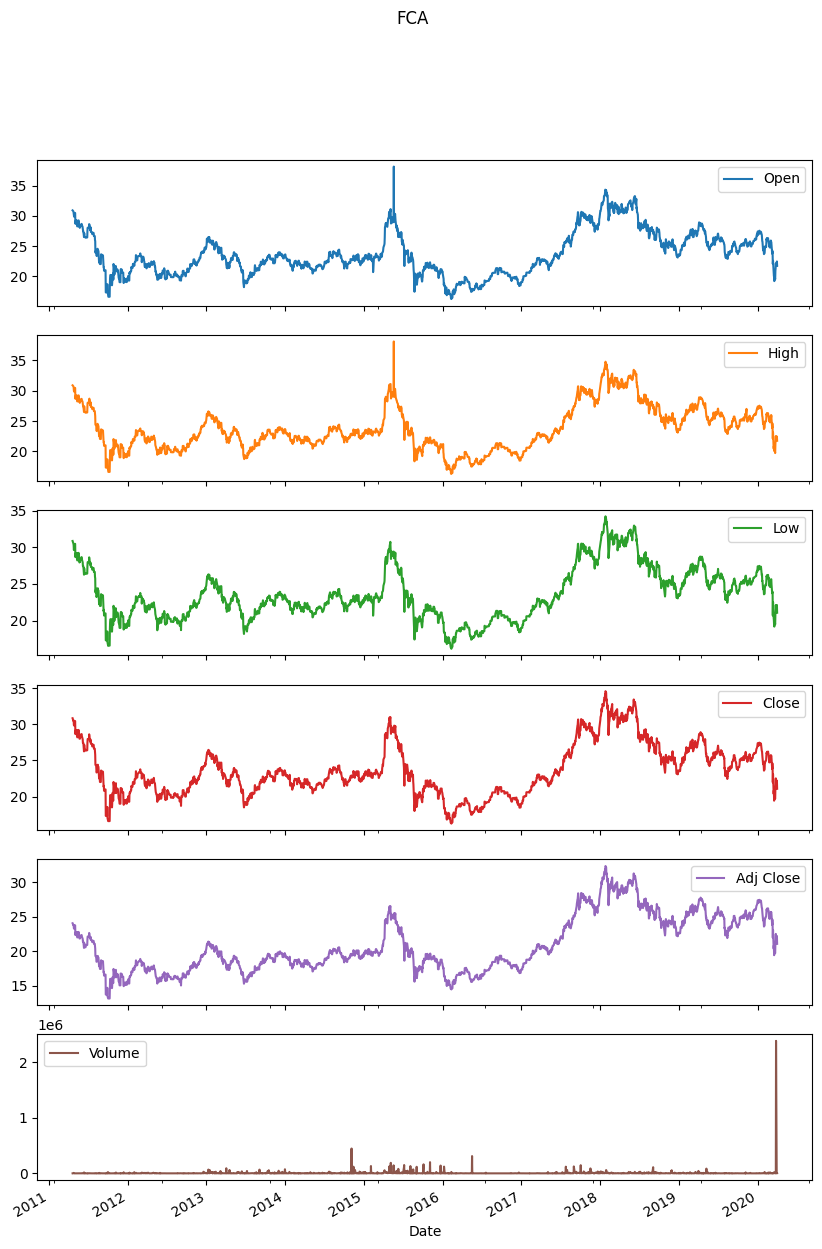

In [101]:
stocks_df.set_index('Date').plot(subplots=True, figsize=(10,15), title=STOCKS_PATH.split('/')[-1].split('.')[0])

<Axes: title={'center': 'Close Price'}, xlabel='Date'>

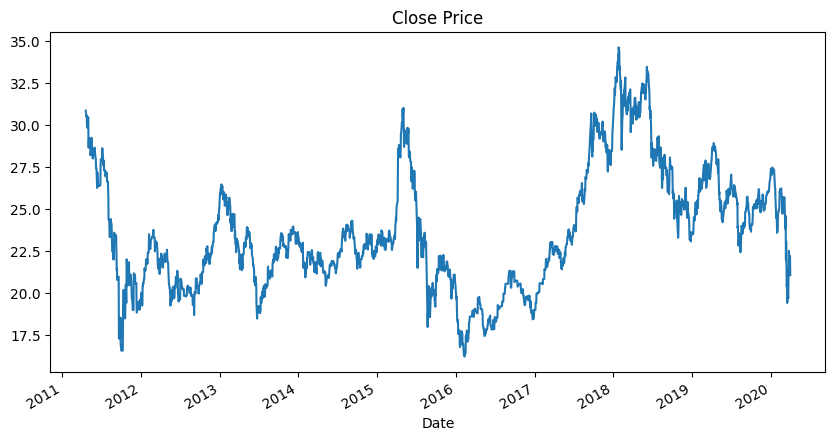

In [100]:
stocks_df.set_index('Date')["Close"].plot(figsize=(10,5), title="Close Price")

In [91]:
# Check number of NaN values in each column
stocks_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [94]:
stocks_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

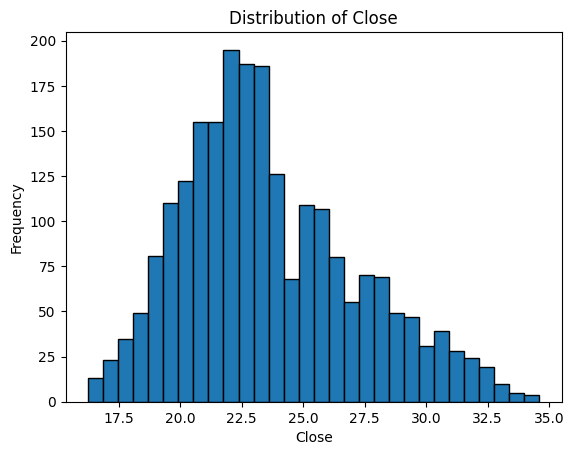

In [92]:
import matplotlib.pyplot as plt

plt.hist(stocks_df["Close"], bins=30, edgecolor='black')
plt.title('Distribution of Close')
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.show()

In [95]:
stocks_df.select_dtypes("number").describe()

,Open,High,Low,Close,Adj Close,Volume
count,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2.251000e+03
mean,23.624149,23.694962,23.538969,23.616313,20.843763,6.010751e+03
std,3.576342,3.609668,3.522863,3.566273,4.027861,5.344569e+04
min,16.219999,16.270000,16.170000,16.250000,13.142098,0.000000e+00
25%,21.000000,21.045000,20.980000,20.995000,17.801504,1.000000e+02
50%,22.959999,23.030001,22.879999,22.980000,19.562454,8.000000e+02
75%,25.855000,25.920000,25.760000,25.860001,24.174763,2.900000e+03
max,38.130001,38.130001,34.209999,34.599998,32.379608,2.381400e+06


In [96]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2251 non-null   datetime64[ns]
 1   Open       2251 non-null   float64       
 2   High       2251 non-null   float64       
 3   Low        2251 non-null   float64       
 4   Close      2251 non-null   float64       
 5   Adj Close  2251 non-null   float64       
 6   Volume     2251 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 123.2 KB


In [97]:
stocks_df.select_dtypes("number").corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999147,0.997504,0.997146,0.932393,0.019875
High,0.999147,1.000000,0.996945,0.997777,0.932962,0.021653
Low,0.997504,0.996945,1.000000,0.999180,0.934859,0.016720
Close,0.997146,0.997777,0.999180,1.000000,0.935054,0.018704
Adj Close,0.932393,0.932962,0.934859,0.935054,1.000000,0.026828
Volume,0.019875,0.021653,0.016720,0.018704,0.026828,1.000000


In [98]:
stocks_df.select_dtypes("number").diff().corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.922949,0.733845,0.664823,0.656253,-0.009640
High,0.922949,1.000000,0.693640,0.742467,0.735411,-0.020418
Low,0.733845,0.693640,1.000000,0.905099,0.897351,-0.023483
Close,0.664823,0.742467,0.905099,1.000000,0.994607,-0.034203
Adj Close,0.656253,0.735411,0.897351,0.994607,1.000000,-0.039050
Volume,-0.009640,-0.020418,-0.023483,-0.034203,-0.039050,1.000000


# Preprocessing

In [111]:
# Transform data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
stocks_df_scaled = pd.DataFrame(scaler.fit_transform(stocks_df.select_dtypes("number")), columns=stocks_df.select_dtypes("number").columns)
stocks_df_scaled["Date"] = stocks_df["Date"]

close_df = stocks_df_scaled[["Date", "Close"]]
close_df.min(), close_df.max()

(Date     2011-04-21 00:00:00
 Close                    0.0
 dtype: object,
 Date     2020-04-01 00:00:00
 Close                    1.0
 dtype: object)

<Axes: title={'center': 'Close Price Scaled'}, xlabel='Date'>

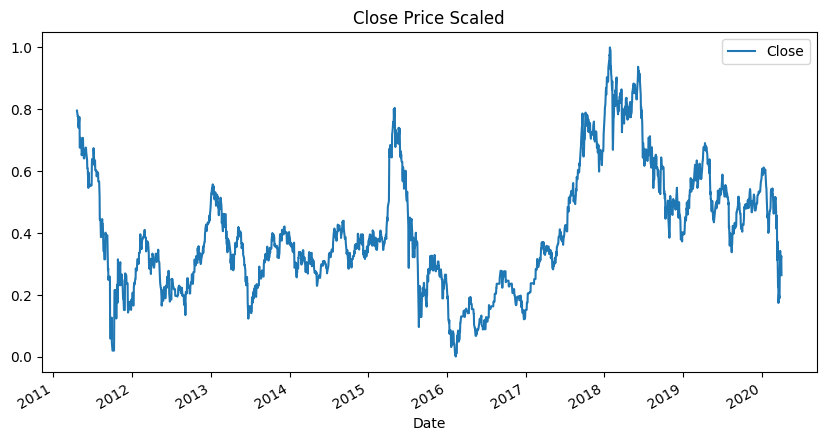

In [116]:
close_df.set_index("Date").plot(figsize=(10,5), title="Close Price Scaled")

In [119]:
window = 7
feature = "Close"
shifted_df = close_df[[feature]].copy()

for i in range(window, 0, -1):
    shifted_df[f"{feature}_t-{i}"] = shifted_df[feature].shift(i)

shifted_df.dropna(inplace=True)

In [120]:
shifted_df

,Close,Close_t-7,Close_t-6,Close_t-5,Close_t-4,Close_t-3,Close_t-2,Close_t-1
7,0.774387,0.795640,0.775477,0.778747,0.745504,0.740600,0.740600,0.774387
8,0.675749,0.775477,0.778747,0.745504,0.740600,0.740600,0.774387,0.774387
9,0.675749,0.778747,0.745504,0.740600,0.740600,0.774387,0.774387,0.675749
10,0.707357,0.745504,0.740600,0.740600,0.774387,0.774387,0.675749,0.675749
11,0.705722,0.740600,0.740600,0.774387,0.774387,0.675749,0.675749,0.707357
...,...,...,...,...,...,...,...,...
2246,0.341689,0.250681,0.173297,0.185831,0.201090,0.188556,0.268120,0.295368
2247,0.299728,0.173297,0.185831,0.201090,0.188556,0.268120,0.295368,0.341689
2248,0.316621,0.185831,0.201090,0.188556,0.268120,0.295368,0.341689,0.299728
2249,0.325341,0.201090,0.188556,0.268120,0.295368,0.341689,0.299728,0.316621


In [123]:
train_size = int(0.8 * len(shifted_df))
train_df = shifted_df[:train_size]
test_df = shifted_df[train_size:]

train_X, train_y = train_df.drop(columns=[feature]), train_df[feature]
test_X, test_y = test_df.drop(columns=[feature]), test_df[feature]

print("Train X shape:", train_X.shape)
print("Train y shape:", train_y.shape)
print("Test X shape:", test_X.shape)
print("Test y shape:", test_y.shape)

Train X shape: (1795, 7)
Train y shape: (1795,)
Test X shape: (449, 7)
Test y shape: (449,)


In [125]:
train_y

7       0.774387
8       0.675749
9       0.675749
10      0.707357
11      0.705722
          ...   
1797    0.900273
1798    0.892098
1799    0.883924
1800    0.846322
1801    0.799455
Name: Close, Length: 1795, dtype: float64

# Train Models

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def plot_chart(train_y, train_pred, test_y, test_pred, model_name, title="Train"):
    plt.figure(figsize=(10,5))
    plt.plot(test_y.index, test_y, label="Actual")
    plt.plot(test_y.index, test_pred, label="Predicted")
    plt.title(f"{model_name} Test Prediction")
    plt.ylabel("Close")
    plt.legend()
    plt.show()

    train_results_df = pd.DataFrame({
        "Data": ["Train"],
        "Model": [model_name],
        "MAE": mean_absolute_error(train_y, train_pred),
        "MSE": mean_squared_error(train_y, train_pred),
        "MAPE": np.mean(np.abs((train_y - train_pred) / train_y)) * 100,
        "R2": r2_score(train_y, train_pred)
    })
    test_results_df = pd.DataFrame({
        "Data": ["Test"],
        "Model": [model_name],
        "MAE": mean_absolute_error(test_y, test_pred),
        "MSE": mean_squared_error(test_y, test_pred),
        "MAPE": np.mean(np.abs((test_y - test_pred) / test_y)) * 100,
        "R2": r2_score(test_y, test_pred)
    })

    results_df = pd.concat([train_results_df, test_results_df])
    return results_df

## Linear Regression

In [ ]:

def train_linear_regression(train_X, train_y):
    lr_model = LinearRegression()

    train_pred = []
    for i in range(len(train_X)):
        lr_model.fit(train_X[i:i+1], train_y[i:i+1])
        train_pred.append(lr_model.predict(train_X[i:i+1])[0])

    train_pred = pd.Series(train_pred, index=train_y.index)
    return lr_model, train_pred

def train_sgd_regressor(train_X, train_y):
    from sklearn.linear_model import SGDRegressor

    sgd_model = SGDRegressor()

    train_pred = []
    for i in range(len(train_X)):
        sgd_model.partial_fit(train_X[i:i+1], train_y[i:i+1])
        train_pred.append(sgd_model.predict(train_X[i:i+1])[0])

    train_pred = pd.Series(train_pred, index=train_y.index)
    return sgd_model, train_pred

def test_linear_regression(lr_model, test_X):
    test_preds = lr_model.predict(test_X)
    return test_preds

### Linear Regression, as required
It does not perform well with walk-forward methodology, because LinearRegression().fit() retrains model from scratch.
Check SGDRegressor as alternative instead.

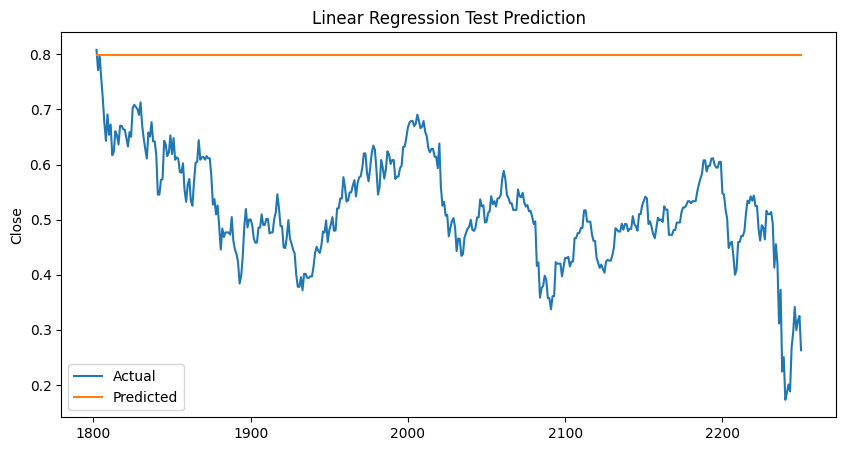

,Data,Model,MAE,MSE,MAPE,R2
0,Train,Linear Regression,0.000000,0.000000,0.00000,1.000000
0,Test,Linear Regression,0.279299,0.087032,60.28861,-8.621828


In [196]:
lr_model, lr_train_pred = train_linear_regression(train_X, train_y)
lr_test_pred = test_linear_regression(lr_model, test_X)
lr_results_df = plot_chart(train_y, lr_train_pred, test_y, lr_test_pred, "Linear Regression")
lr_results_df

### SGD Regressor, alternative to Linear Regression

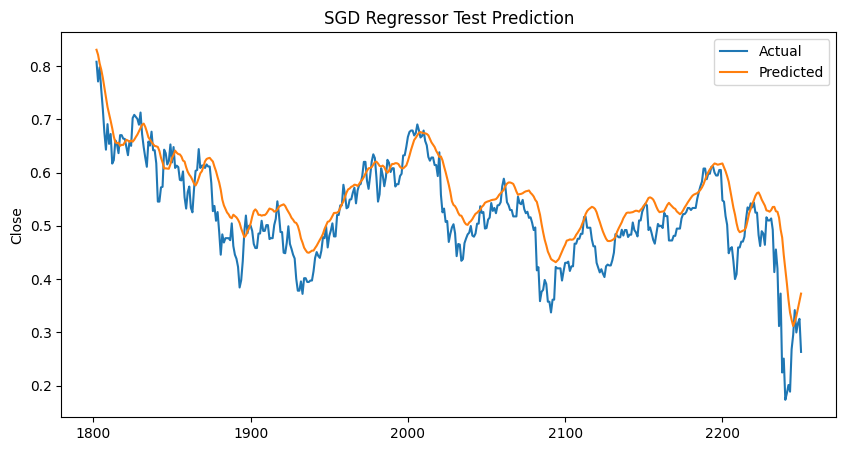

,Data,Model,MAE,MSE,MAPE,R2
0,Train,SGD Regressor,0.058676,0.008336,inf,0.791957
0,Test,SGD Regressor,0.041642,0.003058,9.566969,0.661871


In [197]:
sgd_model, sgd_train_pred = train_sgd_regressor(train_X, train_y)
sgd_test_pred = test_linear_regression(sgd_model, test_X)
sgd_results_df = plot_chart(train_y, sgd_train_pred, test_y, sgd_test_pred, "SGD Regressor")
sgd_results_df

## Random Forest
Same issue as Linear Regression, but there is no incremental alternative. So, the alternative is to use the growing window, model performs pretty well on the testing data.

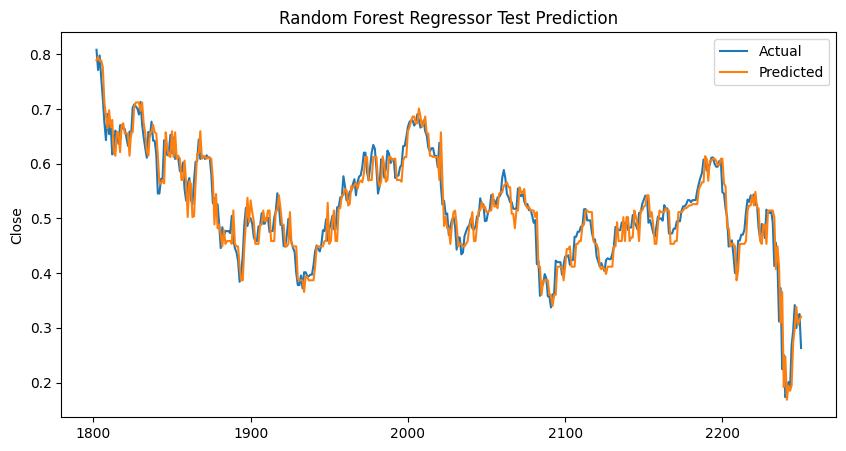

,Data,Model,MAE,MSE,MAPE,R2
0,Train,Random Forest Regressor,0.013035,0.000333,inf,0.991690
0,Test,Random Forest Regressor,0.021367,0.000798,4.450721,0.911749


In [198]:
from sklearn.ensemble import RandomForestRegressor

def train_random_forest_regressor(train_X, train_y):
    rf_model = RandomForestRegressor(n_estimators=10, random_state=35, max_depth=5)

    train_pred = []
    for i in range(len(train_X)):
        rf_model.fit(train_X[:i+1], train_y[:i+1])
        train_pred.append(rf_model.predict(train_X[i:i+1])[0])

    train_pred = pd.Series(train_pred, index=train_y.index)
    return rf_model, train_pred

rf_model, rf_train_pred = train_random_forest_regressor(train_X, train_y)
rf_test_pred = rf_model.predict(test_X)
rf_results_df = plot_chart(train_y, rf_train_pred, test_y, rf_test_pred, "Random Forest Regressor")
rf_results_df

## LSTM-DNN

In [210]:
def train_lstm_dnn(train_X, train_y, model):
    n_steps, n_features = train_X.shape[1], 1

    train_preds = []
    for i in range(len(train_X)):
        X, y = np.array(train_X.iloc[i]).reshape((1, n_steps, n_features)), np.array(train_y.iloc[i]).reshape((1, 1))
        model.train_on_batch(X, y)
        train_preds.append(model.predict(X)[0][0])
        
    train_preds = pd.Series(train_preds, index=train_y.index)
    return model, train_preds

def test_lstm_dnn(model, test_X):
    n_steps, n_features = test_X.shape[1], 1
    
    test_preds = []
    for i in range(len(test_X)):
        X = np.array(test_X.iloc[i]).reshape((1, n_steps, n_features))
        test_preds.append(model.predict(X)[0][0])

    return test_preds

### My architechture

/Users/batiukmaks/PycharmProjects/Neural-Network-Technologies-and-Their-Usage-Labs/venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━

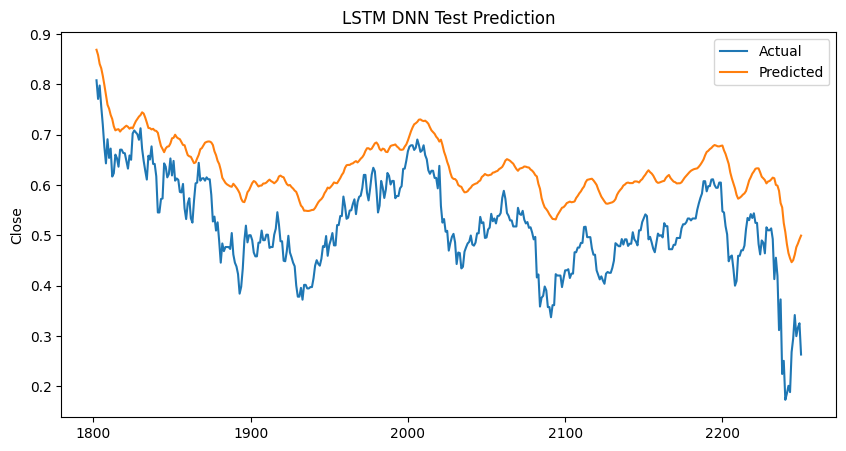

,Data,Model,MAE,MSE,MAPE,R2
0,Train,LSTM DNN,0.056749,0.013352,inf,0.666784
0,Test,LSTM DNN,0.109668,0.014128,23.939686,-0.561950


In [267]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

def create_lstm_dnn_model(n_steps, n_features=1):
    model = Sequential()
    model.add(LSTM(10, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_dnn_model = create_lstm_dnn_model(n_steps=train_X.shape[1], n_features=1)
lstm_dnn_model, lstm_dnn_train_pred = train_lstm_dnn(train_X, train_y, lstm_dnn_model)
lstm_dnn_test_pred = test_lstm_dnn(lstm_dnn_model, test_X)
lstm_dnn_results_df = plot_chart(train_y, lstm_dnn_train_pred, test_y, lstm_dnn_test_pred, "LSTM DNN")
lstm_dnn_results_df

### Architecture from the task reference 

/Users/batiukmaks/PycharmProjects/Neural-Network-Technologies-and-Their-Usage-Labs/venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━

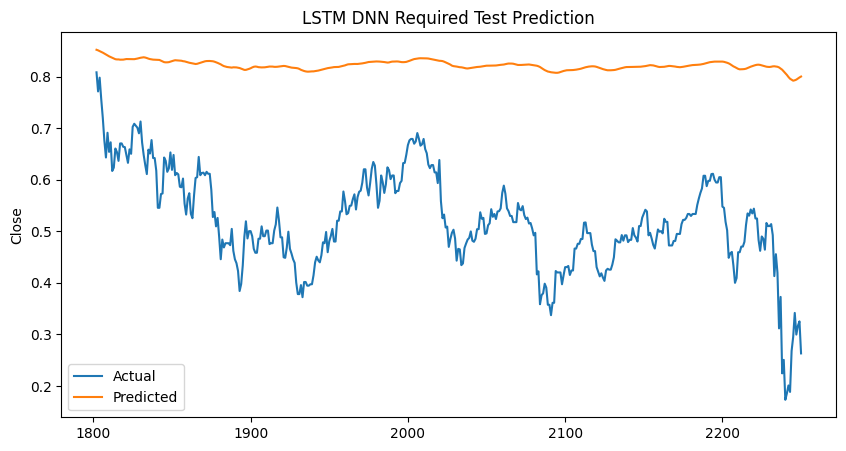

,Data,Model,MAE,MSE,MAPE,R2
0,Train,LSTM DNN Required,0.041924,0.004056,inf,0.898780
0,Test,LSTM DNN Required,0.301809,0.098748,64.476017,-9.917085


In [265]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation

def create_lstm_dnn_model_required(n_steps, n_features=1):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features), return_sequences = True))
    model.add(Dropout(0.5))
    model.add(LSTM(256))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation("linear"))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_dnn_model_required = create_lstm_dnn_model_required(n_steps=train_X.shape[1], n_features=1)
lstm_dnn_model_required, lstm_dnn_train_required_pred = train_lstm_dnn(train_X, train_y, lstm_dnn_model_required)
lstm_dnn_test_required_pred = test_lstm_dnn(lstm_dnn_model_required, test_X)
lstm_dnn_results_required_df = plot_chart(train_y, lstm_dnn_train_required_pred, test_y, lstm_dnn_test_required_pred, "LSTM DNN Required")
lstm_dnn_results_required_df

## 1D-CNN-LSTM-DNN

In [243]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Reshape, LSTM, Dense

def create_deeplob(T=7, NF=1, number_of_lstm=64):
    input_lmd = Input(shape=(T, NF, 1))
    
    conv_first1 = Conv2D(32, (1, 1), strides=(1, 1))(input_lmd)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    conv_first1 = Conv2D(32, (4, 1), padding='same')(conv_first1)
    conv_first1 = keras.layers.LeakyReLU(alpha=0.01)(conv_first1)
    
    # Removed some convolution layers because they would reduce the time dimension too much 

    convsecond_1 = Conv2D(64, (1, 1), padding='same')(conv_first1)
    convsecond_1 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_1)
    
    # Adjusted kernel sizes to be less than time steps
    convsecond_2 = Conv2D(64, (3, 1), padding='same')(conv_first1)
    convsecond_2 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_2)

    convsecond_3 = MaxPooling2D((3, 1), strides=(1, 1), padding='same')(conv_first1)
    convsecond_3 = Conv2D(64, (1, 1), padding='same')(convsecond_3)
    convsecond_3 = keras.layers.LeakyReLU(alpha=0.01)(convsecond_3)
    
    convsecond_output = keras.layers.concatenate([convsecond_1, convsecond_2, convsecond_3], axis=3)
    conv_reshape = Reshape((int(convsecond_output.shape[1]), int(convsecond_output.shape[3])))(convsecond_output)
    conv_reshape = keras.layers.Dropout(0.2, noise_shape=(None, 1, int(conv_reshape.shape[2])))(conv_reshape, training=True)

    conv_lstm = LSTM(number_of_lstm)(conv_reshape)

    out = Dense(1)(conv_lstm)
    model = Model(inputs=input_lmd, outputs=out)
    adam = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=adam, loss='mean_squared_error')

    return model

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


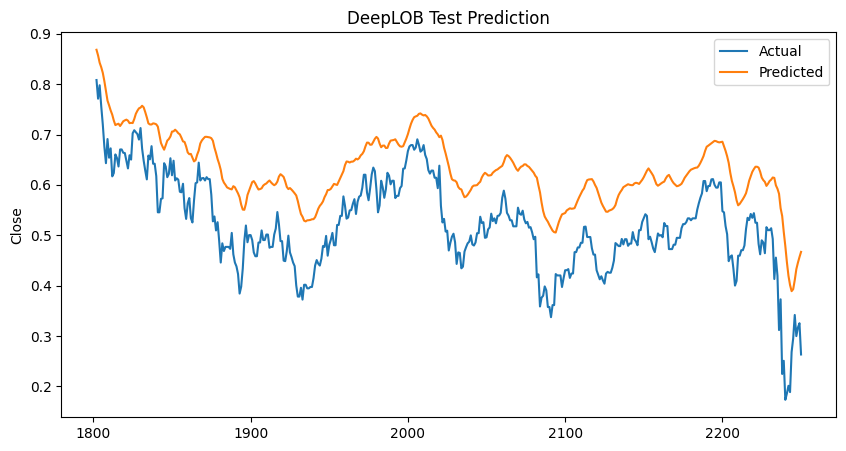

,Data,Model,MAE,MSE,MAPE,R2
0,Train,DeepLOB,0.038165,0.005909,inf,0.852526
0,Test,DeepLOB,0.108409,0.013321,23.226597,-0.472664


In [264]:
def train_deeplob(train_X, train_y, model):
    n_steps, n_features = train_X.shape[1], 1
    
    deeplob_train_X = train_X.values.reshape((-1, train_X.shape[1], 1, 1))
    deeplob_train_y = train_y.values

    train_preds = []
    for i in range(len(deeplob_train_X)):
        X, y = deeplob_train_X[i].reshape((1, n_steps, n_features, 1)), np.array([deeplob_train_y[i]])
        model.train_on_batch(X, y)
        train_preds.append(model.predict(X)[0][0])
        
    train_preds = pd.Series(train_preds, index=train_y.index)
    return model, train_preds

def test_deeplob(model, test_X):
    deeplob_test_X = test_X.values.reshape((-1, test_X.shape[1], 1, 1))
    test_preds = model.predict(deeplob_test_X)
    return test_preds

deeplob_model = create_deeplob(T=train_X.shape[1], NF=1, number_of_lstm=50)
deeplob_model, deeplob_train_pred = train_deeplob(train_X, train_y, deeplob_model)
deeplob_test_pred = test_deeplob(deeplob_model, test_X)
deeplob_results_df = plot_chart(train_y, deeplob_train_pred, test_y, deeplob_test_pred.flatten(), "DeepLOB")
deeplob_results_df

# Results

In [268]:
all_results_df = pd.concat([
    lr_results_df,
    sgd_results_df,
    rf_results_df,
    lstm_dnn_results_df,
    lstm_dnn_results_required_df,
    deeplob_results_df
])

all_results_df

,Data,Model,MAE,MSE,MAPE,R2
0,Train,Linear Regression,0.000000,0.000000,0.000000,1.000000
0,Test,Linear Regression,0.279299,0.087032,60.288610,-8.621828
0,Train,SGD Regressor,0.058676,0.008336,inf,0.791957
0,Test,SGD Regressor,0.041642,0.003058,9.566969,0.661871
0,Train,Random Forest Regressor,0.013035,0.000333,inf,0.991690
0,Test,Random Forest Regressor,0.021367,0.000798,4.450721,0.911749
0,Train,LSTM DNN,0.056749,0.013352,inf,0.666784
0,Test,LSTM DNN,0.109668,0.014128,23.939686,-0.561950
0,Train,LSTM DNN Required,0.041924,0.004056,inf,0.898780
0,Test,LSTM DNN Required,0.301809,0.098748,64.476017,-9.917085


In [269]:
all_results_df[all_results_df["Data"] == "Test"].sort_values(by=["MAE"])

,Data,Model,MAE,MSE,MAPE,R2
0,Test,Random Forest Regressor,0.021367,0.000798,4.450721,0.911749
0,Test,SGD Regressor,0.041642,0.003058,9.566969,0.661871
0,Test,DeepLOB,0.108409,0.013321,23.226597,-0.472664
0,Test,LSTM DNN,0.109668,0.014128,23.939686,-0.561950
0,Test,Linear Regression,0.279299,0.087032,60.288610,-8.621828
0,Test,LSTM DNN Required,0.301809,0.098748,64.476017,-9.917085


# Conclusions

- In this case, Random Forest Regressor with 10 estimators and maximum depth set to 5 performed the best. 
- Results show that in this case using complex neural networks may not be the best option.
